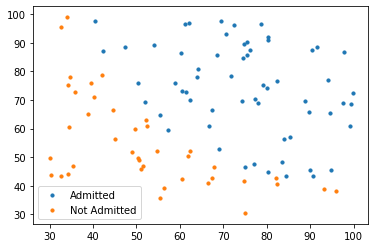

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import fmin_tnc

def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    data = load_data("data.txt", None)

    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    plt.legend()
    plt.show()

In [170]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.],
       [0.]])

In [171]:
#theta = np.squeeze(theta)
theta

array([[0.],
       [0.],
       [0.]])

In [172]:
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [173]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [174]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))
sigmoid(0)

0.5

In [175]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [176]:
cost_function(theta, X, y)

0.6931471805599453

In [194]:
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
              fprime=gradient,args=(x, y.flatten()))
    return opt_weights

def get_min(x, y, theta):
    opt_weights = minimize(cost_function, theta, method="Newton-CG", jac=gradient, args=(x,y.flatten()))
    return opt_weights
    
#parameters = fit(X, y, theta)

In [195]:
#gradient(theta, X, y)


In [199]:
parameters = get_min(X, y.any(), theta)

In [200]:
parameters

     fun: 2.305481883010613e-07
     jac: array([-2.30547693e-07, -7.95457492e-06, -1.03754867e-05])
 message: 'Optimization terminated successfully.'
    nfev: 17
    nhev: 0
     nit: 16
    njev: 66
  status: 0
 success: True
       x: array([0.00332144, 0.14844878, 0.16846516])

In [201]:
parameters = parameters.x
parameters

array([0.00332144, 0.14844878, 0.16846516])

In [190]:
parameters2 = fit(X, y, theta)
parameters2

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

In [192]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
#y_values2 = - (parameters2[0] + np.dot(parameters2[1], x_values)) / parameters2[2]
y_values = np.dot(X, parameters)
y_values

array([18.28760417, 11.89412473, 17.60630633, 23.47733942, 24.42853766,
       16.1832259 , 25.33334455, 18.98338318, 26.02741431, 19.87113111,
       20.67348045, 16.29459156, 25.10624984, 26.76260564, 18.68229352,
       23.04358926, 19.14163217, 17.95366312, 26.14792202, 19.44562076,
       17.22140151, 24.40063067, 15.73565156, 12.52982572, 23.19049793,
       21.03226685, 19.4583393 , 20.36260051, 17.64834375, 16.71053482,
       21.38059492, 22.29279029, 18.37349309, 19.42641658, 17.96572564,
       16.91005722, 21.69409176, 23.160507  , 18.10936729, 17.75277603,
       21.94447395, 15.54917041, 25.06940362, 19.07362377, 15.30082699,
       18.01066549, 23.33228576, 29.12801319, 25.52016799, 28.53826594,
       24.36493444, 25.01641907, 20.75467588, 15.3031232 , 15.85862039,
       17.44012804, 26.09947315, 20.94439206, 22.78845716, 23.87811107,
       25.64326998, 13.16282052, 14.96832262, 12.82020549, 17.82879515,
       16.8067923 , 22.44047657, 16.02859751, 27.43907377, 20.18

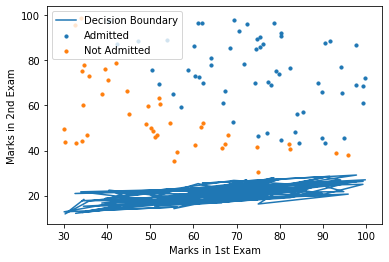

In [193]:
plt.plot(X[:,1], y_values, label='Decision Boundary')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()